# SVD for Image Compression 

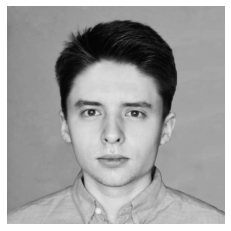

In [1]:
import numpy as np
from numpy.linalg import svd

from skimage.io import imread
import matplotlib.pyplot as plt


# Import the image
pic_dat = imread('pic.jpg', as_gray=True)

# Image size
x, y = pic_dat.shape[0], pic_dat.shape[1]  

plt.imshow(pic_dat, cmap="gray")
plt.axis('off')
plt.show()

In [2]:
# SVD decomposition
U, s, VT = svd(pic_dat, full_matrices=False)

print('Total singular values: {}.'.format(len(s)))

Total singular values: 640.


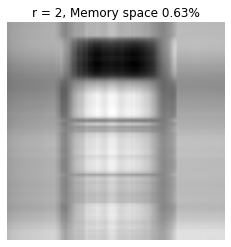

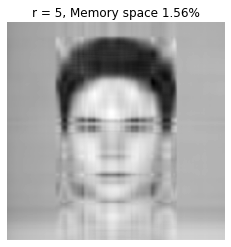

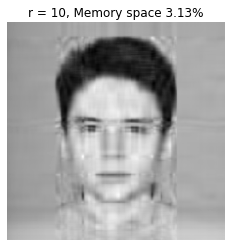

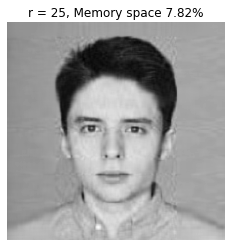

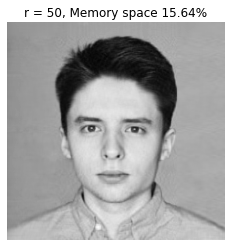

In [3]:
for r in 2, 5, 10, 25, 50:
    # r is the number of singular values used

    # Restoring the image
    pic_reduce = U[:, :r] @ np.diag(s[:r]) @ VT[:r, :]

    plt.imshow(pic_reduce, cmap="gray")
    plt.axis('off')
    plt.title('r = ' + str(r) +
              ', Memory space {:.2%}'.format((x + y + 1) * r / (x * y)))
    plt.show()

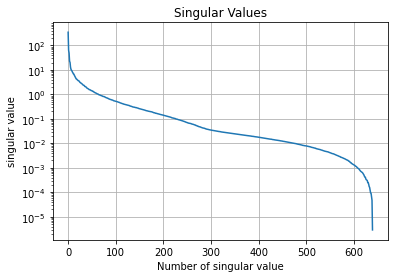

In [4]:
fig, ax = plt.subplots()

ax.semilogy(s)
ax.grid()
plt.title('Singular Values')
ax.set_xlabel('Number of singular value')
ax.set_ylabel('singular value')

plt.show()

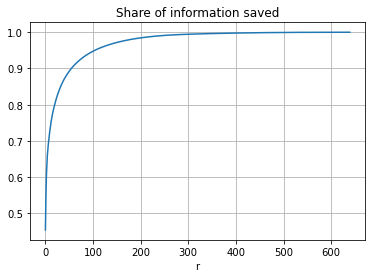

In [5]:
fig, ax = plt.subplots()

ax.plot(np.cumsum(s) / np.sum(s))
ax.grid()
plt.title('Share of information saved')
ax.set_xlabel('r')

plt.show()